# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Ikhsan Aditya Nuur Qodri]
- **Email:** [ikhsanaditya.qodri@gmail.com]
- **ID Dicoding:** [ikhsan_datascientist]

## Menentukan Pertanyaan Bisnis

- Bagaimana performa dan revenue E-Commerce dalam beberapa bulan?
- Produk apa yang paling banyak dan paling sedikit terjual?
- Metode Pembayaran apa yang paling banyak digunakan dan paling sedikit?
- Bagaimana persebaraan pelanggan berdasarkan lokasi geografis?
- Bagaimana persebaraan penjual berdasarkan lokasi geografis?
- Siapa Top Seller Penjualan Produk?

## Import Semua Packages/Library yang Digunakan

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import unidecode
import matplotlib.image as mpimg
import urllib.request

## Data Wrangling

### Gathering Data

In [145]:
customer_df = pd.read_csv('database\customers_dataset.csv')
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [146]:
geolocation_df = pd.read_csv('database/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [147]:
order_item_df = pd.read_csv('database\order_items_dataset.csv')
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [148]:
order_payments_df = pd.read_csv('database\order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [149]:
order_reviews_df = pd.read_csv('database\order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [150]:
order_dataset_df = pd.read_csv('database\orders_dataset.csv')
order_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [151]:
product_category_name_translation_df = pd.read_csv('database\product_category_name_translation.csv')
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [152]:
products_dataset_df = pd.read_csv('database\products_dataset.csv')
products_dataset_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [153]:
sellers_dataset_df = pd.read_csv('database\sellers_dataset.csv')
sellers_dataset_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

In [154]:
customer_df.info()
print(customer_df.isnull().sum())
print('data duplikat:',customer_df.duplicated().sum())
print(customer_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
data duplikat: 0
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     274fa6071e5e17fe303b9748641082c8  8d50f5ea

In [155]:
geolocation_df.info()
print(geolocation_df.isnull().sum())
print('data duplikat:',geolocation_df.duplicated().sum())
print(geolocation_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
data duplikat: 261831
        geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
count                  1.000163e+06     1.000163e+06     1.000163e+06   
unique                          NaN              NaN       

In [156]:
order_item_df.info()
print(order_item_df.isnull().sum())
print('data duplikat:',order_item_df.duplicated().sum())
print(order_item_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
data duplikat: 0
                                order_id  order_item_id  \
count                             112650  112650.000000   
unique                             98666      

In [157]:
order_payments_df.info()
print(order_payments_df.isnull().sum())
print('data duplikat:',order_payments_df.duplicated().sum())
print(order_payments_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
data duplikat: 0
                                order_id  payment_sequential payment_type  \
count                             103886       103886.000000       103886   
unique                             99440                 NaN            5   
top     fa65dad1b0e818e3ccc5cb0e39231352                 NaN  credit_card

In [158]:
order_reviews_df.info()
print(order_reviews_df.isnull().sum())
print('data duplikat:',order_reviews_df.duplicated().sum())
print(order_reviews_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
data duplikat: 0
                               review_id                          order_id  \
count                     

In [159]:
order_dataset_df.info()
print(order_dataset_df.isnull().sum())
print('data duplikat:',order_dataset_df.duplicated().sum())
print(order_dataset_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2

In [160]:
products_dataset_df.info()
print(products_dataset_df.isnull().sum())
print('data duplikat:',products_dataset_df.duplicated().sum())
print(products_dataset_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_l

In [161]:
product_category_name_translation_df.info()
print(product_category_name_translation_df.isnull().sum())
print('data duplikat:',product_category_name_translation_df.duplicated().sum())
print(product_category_name_translation_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
product_category_name            0
product_category_name_english    0
dtype: int64
data duplikat: 0
       product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1


In [162]:
sellers_dataset_df.info()
print(sellers_dataset_df.isnull().sum())
print('data duplikat:',sellers_dataset_df.duplicated().sum())
print(sellers_dataset_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
data duplikat: 0
                               seller_id  seller_zip_code_prefix seller_city  \
count                               3095             3095.000000        3095   
unique                              3095                     NaN         611   
top     9e25199f6ef7e7c347120ff175652c3b                     NaN   sao paulo   
freq                                   1                     NaN     

### Cleaning Data

In [163]:
geolocation_df.drop_duplicates(subset=['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng'], inplace=True)
print('data duplikat setelah di drop berdasarkan zip,lat,lng:', geolocation_df.duplicated().sum())

data duplikat setelah di drop berdasarkan zip,lat,lng: 0


In [164]:
order_item_df['shipping_limit_date'] = pd.to_datetime(order_item_df['shipping_limit_date'])

In [165]:
order_reviews_df['review_comment_title'].fillna("")
order_reviews_df['review_comment_message'].fillna("")
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])

In [166]:
order_dataset_df['order_purchase_timestamp'] = pd.to_datetime(order_dataset_df['order_purchase_timestamp'])
order_dataset_df['order_approved_at'] = pd.to_datetime(order_dataset_df['order_approved_at'], errors='coerce')
order_dataset_df['order_delivered_carrier_date'] = pd.to_datetime(order_dataset_df['order_delivered_carrier_date'], errors='coerce')
order_dataset_df['order_delivered_customer_date'] = pd.to_datetime(order_dataset_df['order_delivered_customer_date'], errors='coerce')
order_dataset_df['order_estimated_delivery_date'] = pd.to_datetime(order_dataset_df['order_estimated_delivery_date'])

## Exploratory Data Analysis (EDA)

### Explore to Merge

In [167]:
orders_customers = pd.merge(order_dataset_df, customer_df, on='customer_id', how='left')

# Merge dengan order_payments_df
orders_customers_payments = pd.merge(orders_customers, order_payments_df, on='order_id', how='left')

# Merge dengan order_reviews_df
orders_all = pd.merge(orders_customers_payments, order_reviews_df, on='order_id', how='left')

# Merge dengan order_items_df
orders_all = pd.merge(orders_all, order_item_df, on='order_id', how='left')

# Merge dengan products_dataset_df
orders_all = pd.merge(orders_all, products_dataset_df, on='product_id', how='left')

# Merge dengan sellers_dataset_df
orders_all = pd.merge(orders_all, sellers_dataset_df, on='seller_id', how='left')

# Merge dengan product_category_name_translation_df
orders_all = pd.merge(orders_all, product_category_name_translation_df, on='product_category_name', how='left')

print(orders_all.info())
orders_all.to_csv("all_data.csv", index=False)

max_state = (geolocation_df.groupby(['geolocation_zip_code_prefix', 'geolocation_state'])
             .size()
             .reset_index(name='count')
             .sort_values('count', ascending=False) # Mengurutkan berdasarkan count
             .drop_duplicates(subset='geolocation_zip_code_prefix')
             .drop('count', axis=1))

geolocation_customer = (geolocation_df.groupby(['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'])
                         [['geolocation_lat', 'geolocation_lng']]
                         .median()
                         .reset_index())

geolocation_customer = pd.merge(geolocation_customer, max_state, on=['geolocation_zip_code_prefix', 'geolocation_state'], how='left')

customers_geo = pd.merge(customer_df, geolocation_customer, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

geolocation_seller = (geolocation_df.groupby(['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'])
                         [['geolocation_lat', 'geolocation_lng']]
                         .median()
                         .reset_index())

geolocation_seller = pd.merge(geolocation_seller, max_state, on=['geolocation_zip_code_prefix', 'geolocation_state'], how='left')

sellers_geo = pd.merge(sellers_dataset_df, geolocation_seller, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

all_df = pd.merge(orders_all, customers_geo, on='customer_id', how='left')

all_df = pd.merge(orders_all, sellers_geo, on='seller_id', how='left')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              118966 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 6   order_delivered_customer_date  115722 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 8   customer_unique_id             119143 non-null  object        
 9   customer_zip_code_prefix       119143 non-null  int64         
 10  customer_city                  119143 non-null  object        
 11  

### Explore ...

In [168]:
all_df = orders_all.copy()

all_df['total_price'] = all_df['price'] * all_df['order_item_id']

all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

all_df_2017 = all_df[all_df['order_purchase_timestamp'].dt.year == 2017].copy() # .copy() penting!
# Analisis Bulanan
monthly_orders_df = all_df_2017.resample(rule='ME', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "total_price": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%B')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue",
    "order_purchase_timestamp": "order_date"
}, inplace=True)

### Explore Product

In [169]:
products_orders = pd.merge(order_item_df, products_dataset_df, on='product_id', how='inner')
products_orders = pd.merge(products_orders, product_category_name_translation_df, on='product_category_name', how='left')

product_sales = products_orders.groupby('product_category_name_english')['product_id'].count().reset_index()
product_sales.columns = ['product_category_name_english', 'product_count']

top_5_products = product_sales.sort_values(by='product_count', ascending=False).head(5)
bottom_5_products = product_sales.sort_values(by='product_count', ascending=True).head(5)

### Explore Payment

In [170]:
payment_counts = orders_customers_payments.groupby('payment_type')['order_id'].count().sort_values(ascending=False).reset_index()
payment_counts.columns = ['payment_type', 'count']
print(payment_counts)

  payment_type  count
0  credit_card  76795
1       boleto  19784
2      voucher   5775
3   debit_card   1529
4  not_defined      3


### Explore customer

In [180]:
customers_geo.to_csv("geolocation_customer.csv", index=False)
customer_orders_sellers.to_csv("customer_orders_sellers.csv", index=False)
customers_geo.to_csv("geolocation_customer.csv", index=False)

customer_state_counts = all_df['customer_state'].value_counts()



### Explore Seller

In [181]:
sellers_orders = pd.merge(order_item_df, sellers_dataset_df, on='seller_id', how='inner')
seller_product_count = sellers_orders.groupby('seller_id')['product_id'].count().sort_values(ascending=False)

top_5_sellers = seller_product_count.head(10).reset_index()
top_5_sellers.columns = ['seller_id', 'product_count']

bottom_5_sellers = seller_product_count.tail(10).reset_index()
bottom_5_sellers.columns = ['seller_id', 'product_count']

sellers_geo.to_csv("geolocation_seller.csv", index=False)
customer_orders_sellers.to_csv("customer_orders_sellers.csv", index=False)
sellers_geo.to_csv("geolocation_seller.csv", index=False)

seller_state_counts = all_df['customer_state'].value_counts()


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

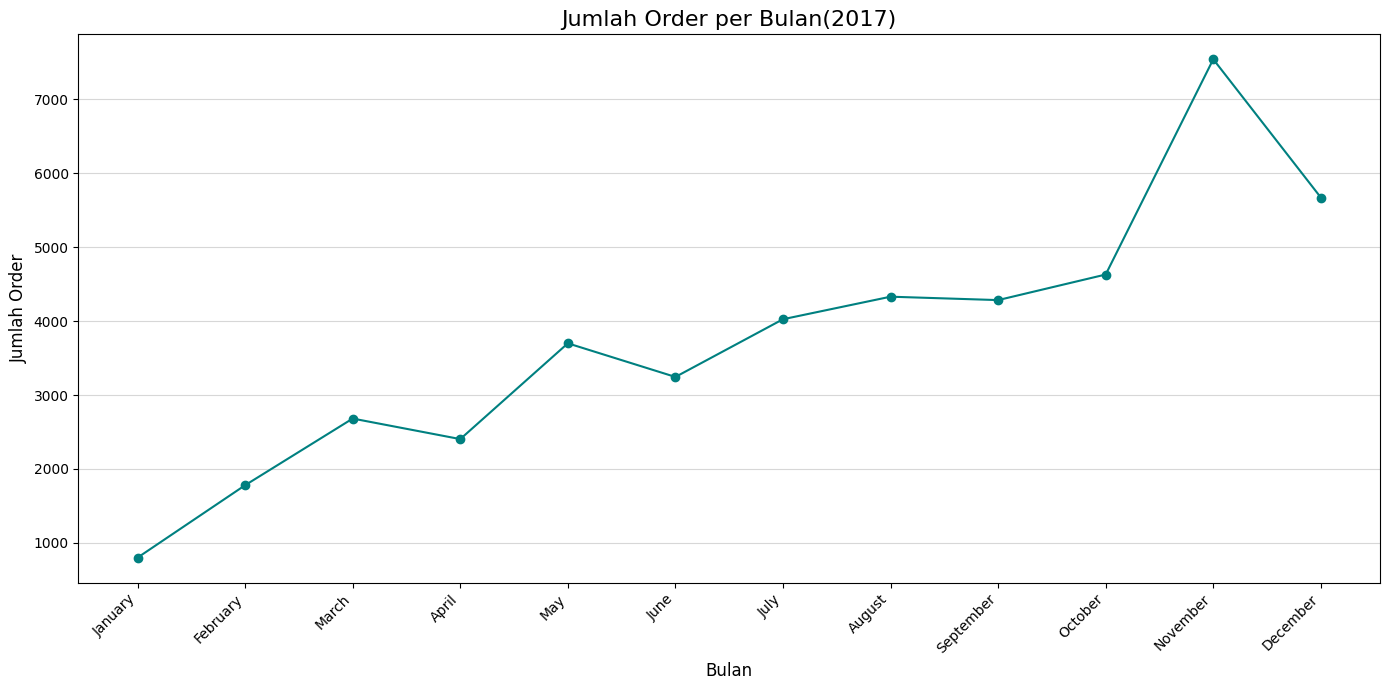

In [182]:
plt.figure(figsize=(14, 7))  # Ukuran figure
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["order_count"], marker='o', linestyle='-', color="#008080") # Warna teal/hijau tua
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Order", fontsize=12)
plt.title("Jumlah Order per Bulan(2017)", fontsize=16) # Ukuran judul diperbesar
plt.xticks(rotation=45, ha='right') # Rotasi label sumbu x
plt.grid(axis='y', alpha=0.5) # Grid hanya pada sumbu y, transparansi diatur
plt.tight_layout() # Mencegah label tumpang tindih
plt.show()

**Insight:**
- terdapat penurunan


### Pertanyaan 2:

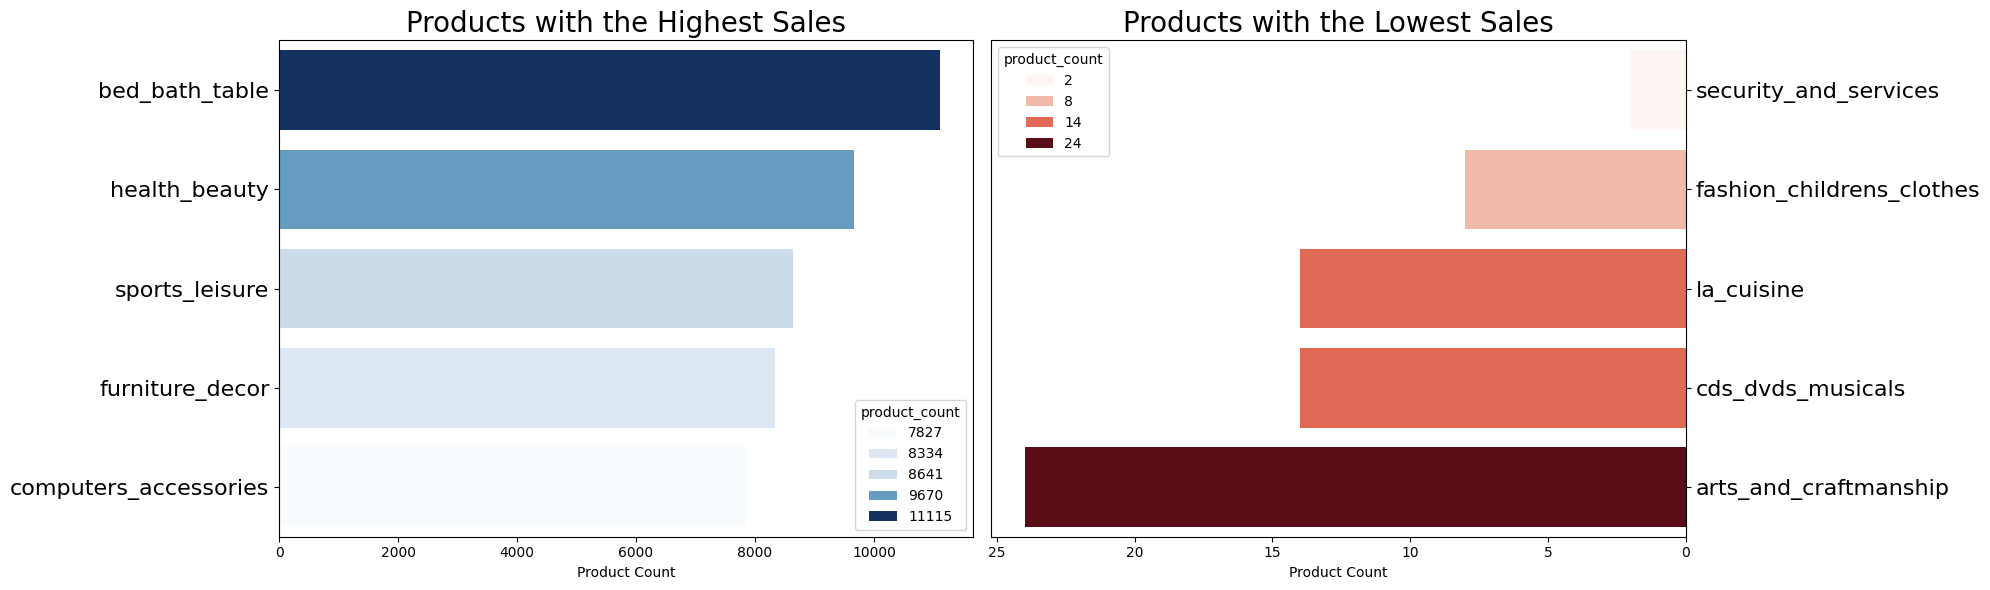

In [183]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Grafik Top 10 Produk
sns.barplot(x="product_count", y="product_category_name_english",hue="product_count", data=top_5_products, palette='Blues', ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Product Count")
ax[0].set_title("Products with the Highest Sales", loc="center", fontsize=20)
ax[0].tick_params(axis='y', labelsize=16)

# Grafik Bottom 10 Produk
sns.barplot(x="product_count", y="product_category_name_english",hue="product_count", data=bottom_5_products, palette='Reds', ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Product Count")
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Products with the Lowest Sales", loc="center", fontsize=20)
ax[1].tick_params(axis='y', labelsize=16)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

### Pertanyaan 3:

<Figure size 800x800 with 0 Axes>

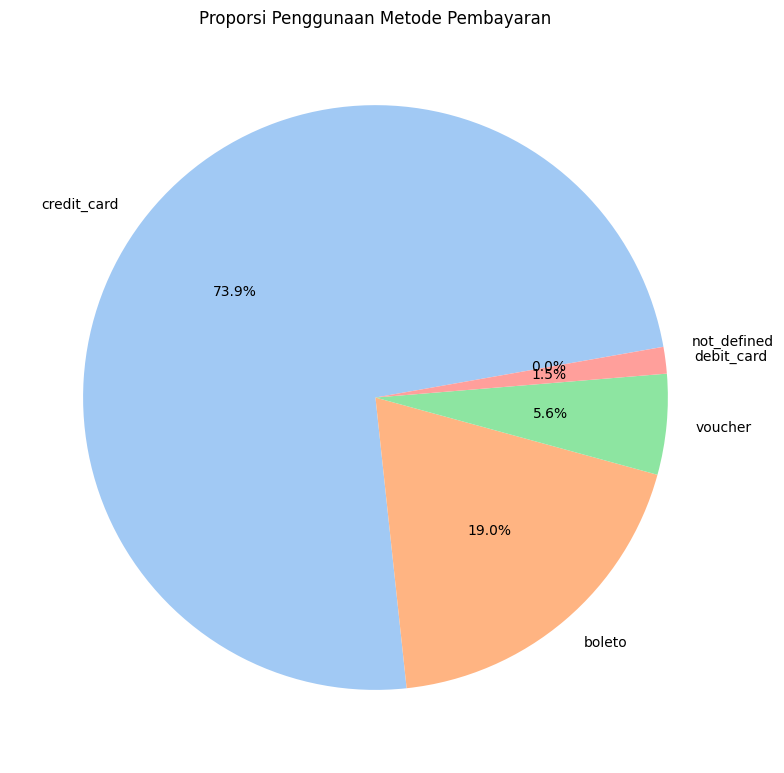

In [184]:
plt.figure(figsize=(8, 8))
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(payment_counts['count'], 
                                   labels=payment_counts['payment_type'], 
                                   autopct='%1.1f%%', 
                                   startangle=10, 
                                   colors=sns.color_palette('pastel'))

plt.title('Proporsi Penggunaan Metode Pembayaran')
plt.tight_layout()
plt.show()

### Pertanyaan 4:

<Figure size 1200x1200 with 0 Axes>

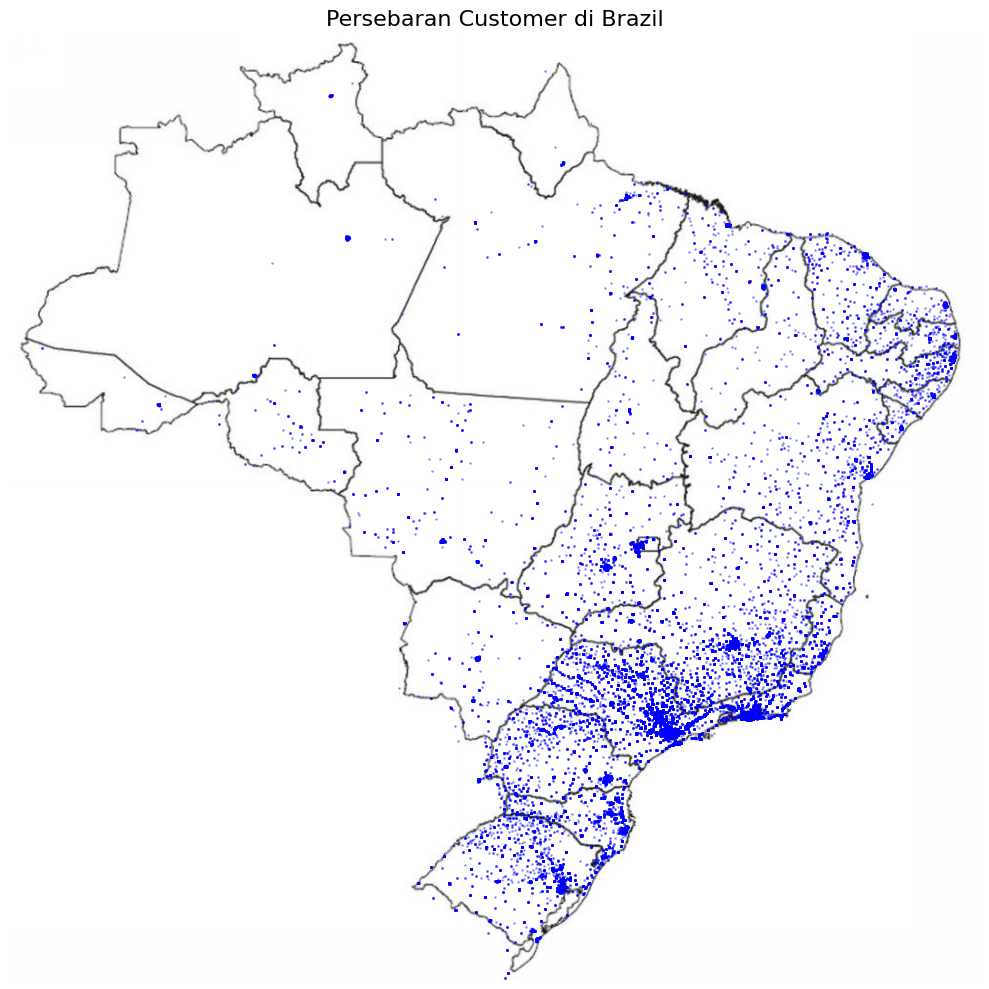


Persebaran Pelanggan Berdasarkan State:
 customer_state
SP    50265
RJ    15518
MG    13819
RS     6573
PR     6043
SC     4345
BA     4091
DF     2516
GO     2466
ES     2360
PE     1906
CE     1565
MT     1132
PA     1129
MS      862
MA      856
PB      644
PI      576
RN      574
AL      464
SE      403
TO      340
RO      292
AM      173
AC       95
AP       84
RR       52
Name: count, dtype: int64


In [185]:
def plot_brazil_map(data, title="Distribusi di Brazil"): # Tambahkan parameter title
    try:
        brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    except urllib.error.URLError:
        print("Error: Gagal mengunduh gambar peta Brazil. Periksa koneksi internet Anda.")
        return

    plt.figure(figsize=(12, 12))
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10, 10), alpha=0.3, s=1, c='blue')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8, -33.75116944, 5.4], aspect='auto')
    plt.title(title, fontsize=16) # Gunakan parameter title
    plt.tight_layout()
    plt.show()

# Visualisasi Persebaran Customer
plot_brazil_map(customers_geo.drop_duplicates(subset='customer_unique_id'), title="Persebaran Customer di Brazil")
print("\nPersebaran Pelanggan Berdasarkan State:\n", customer_state_counts)

### Pertanyaan 5:

<Figure size 1200x1200 with 0 Axes>

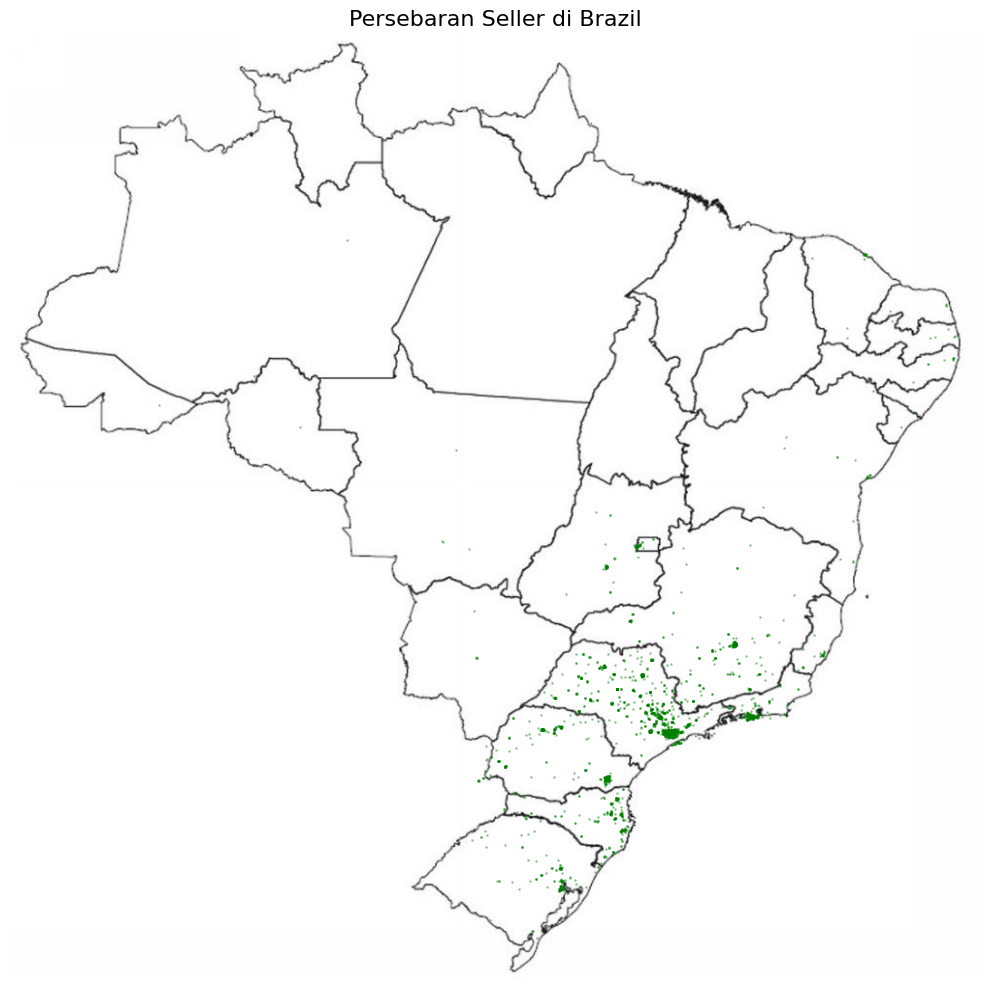


Persebaran Penjual Berdasarkan State:
 customer_state
SP    50265
RJ    15518
MG    13819
RS     6573
PR     6043
SC     4345
BA     4091
DF     2516
GO     2466
ES     2360
PE     1906
CE     1565
MT     1132
PA     1129
MS      862
MA      856
PB      644
PI      576
RN      574
AL      464
SE      403
TO      340
RO      292
AM      173
AC       95
AP       84
RR       52
Name: count, dtype: int64


In [186]:

def plot_brazil_map(data, title="Distribusi di Brazil"): # Tambahkan parameter title
    try:
        brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    except urllib.error.URLError:
        print("Error: Gagal mengunduh gambar peta Brazil. Periksa koneksi internet Anda.")
        return

    plt.figure(figsize=(12, 12))
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10, 10), alpha=0.3, s=1, c='green')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8, -33.75116944, 5.4], aspect='auto')
    plt.title(title, fontsize=16) # Gunakan parameter title
    plt.tight_layout()
    plt.show()

# Visualisasi Persebaran seller
plot_brazil_map(sellers_geo.drop_duplicates(subset='seller_id'), title="Persebaran Seller di Brazil")
print("\nPersebaran Penjual Berdasarkan State:\n", seller_state_counts)

### Pertanyaan 6:

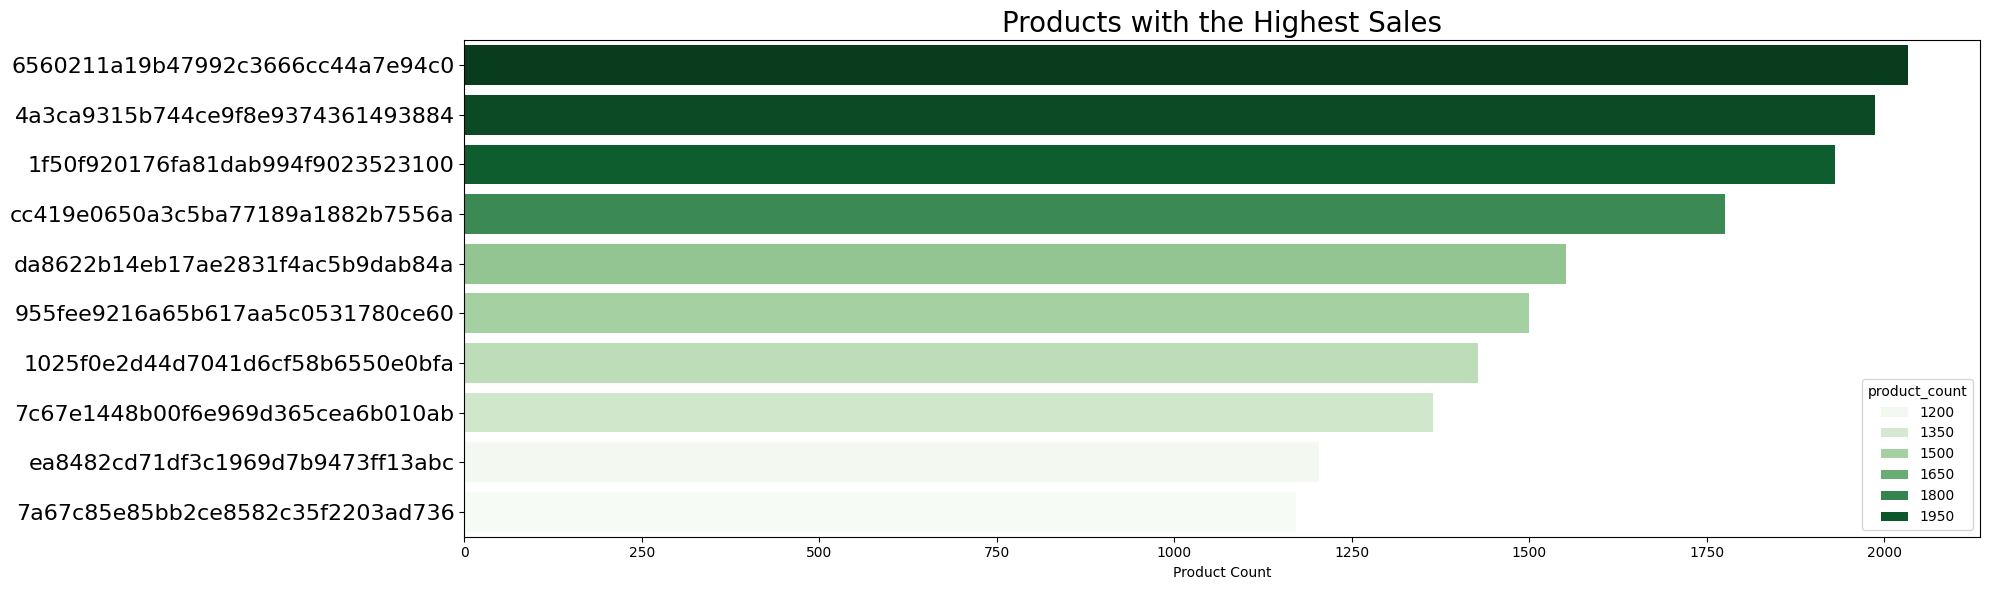

In [187]:
fig, ax = plt.subplots(ncols=1, figsize=(20, 6))

sns.barplot(x="product_count", y="seller_id", hue="product_count", data=top_5_sellers, palette='Greens', ax=ax)
ax.set_ylabel(None)
ax.set_xlabel("Product Count")
ax.set_title("Products with the Highest Sales", loc="center", fontsize=20)
ax.tick_params(axis='y', labelsize=16)

plt.tight_layout()
plt.show()

## Conclusion

### Bagaimana performa dan revenue E-Commerce dalam beberapa bulan
Performa dan revenue dalam beberaoa bulan mengalami kenaikan.
### Produk apa yang paling banyak dan paling sedikit terjual?
produk dengan penjualan terbanyak adalah bed_bath_table dan dengan penjualan paling sedikit securiity and services
### Metode Pembayaran apa yang paling banyak digunakan dan paling sedikit?
pembayaran menggunakan credit_card paling banyak digunakan dan yang sedikit digunakan menggunakan debit_card
### Bagaimana persebaraan pelanggan berdasarkan lokasi geografis?
pelanggan E-commerce banyak ditemukan di Sao Paulo
### Bagaimana persebaraan penjual berdasarkan lokasi geografis?
seller E-commerce banyak ditemukan di Sao Paulo
### Siapa Top Seller Penjualan Produk?
Seller dengan ID = 6560211a19b47992c3666cc44a7e94c0